# Unsupervised Clustering using Self Organizing Maps

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Create a dataset

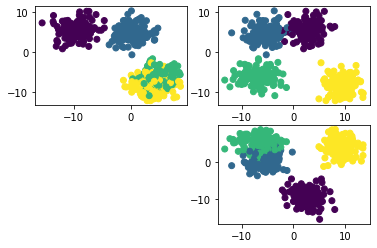

In [2]:
features, labels = make_blobs(n_samples=500, n_features=3, centers=4, cluster_std=2,random_state=10)
plt.subplot(2,2,1)
plt.scatter(features.T[1,:],features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(features.T[2,:],features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(features.T[2,:],features.T[1,:],c=labels)

# Normalize Data

In [3]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
#alternatively you can just use fit transform
#scaled_features = scaler.fit_transform(features)

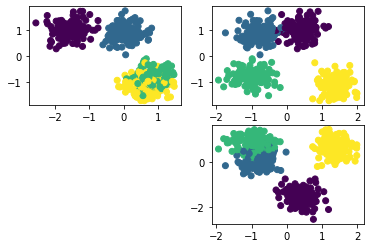

In [4]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=labels)

# Self Organizing Feature Map

## Installation

Read more about this module: https://github.com/JustGlowing/minisom

In [5]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=c1dabfa8aa48381fd0763c510ecd03f2843780bce52fa7f8fe19ead880dea8b6
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


## Implementation

In [6]:
from minisom import MiniSom

In [7]:
model=MiniSom(2,2,3,sigma=0.5, learning_rate=0.3)
model.train(scaled_features,10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.48504779847990875


In [8]:
model._weights

array([[[ 0.95989955, -1.68238436,  0.37145165],
        [-1.16802713,  0.64609459,  1.35967991]],

       [[-0.82471135,  0.7964386 , -0.92291233],
        [ 0.99429606,  0.02287502, -0.82620951]]])

In [9]:
result=model.activation_response(scaled_features)
print ("Active Perceptrons are:\n",result)

Active Perceptrons are:
 [[125. 125.]
 [125. 125.]]


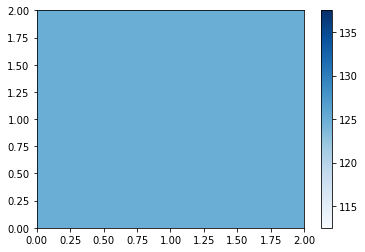

In [10]:
plt.pcolor(result.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [11]:
SOM_Cluster=[]
for record in scaled_features:
  SOM_Cluster.append(model.winner(record))

In [12]:
SOM_Cluster_index=[coordiate[0]*4+coordiate[1] for coordiate in SOM_Cluster]

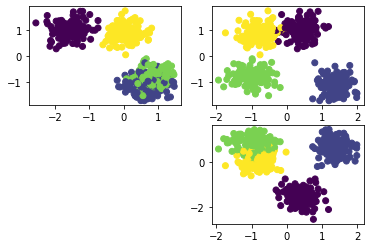

In [13]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=SOM_Cluster_index)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=SOM_Cluster_index)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=SOM_Cluster_index)

# Image Color Quantization



In [15]:
# Uncomment to mount your google drive
# from google.colab import drive
# drive.mount('/gdrive')

Mounted at /gdrive


In [16]:
data_file_path = "/gdrive/My Drive/Colab Notebooks/Puppy.jpg"
img=plt.imread(data_file_path)

In [17]:
type(img)

numpy.ndarray

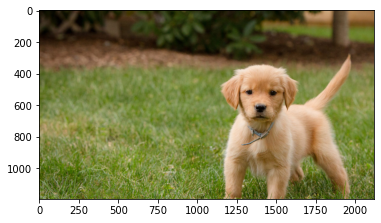

In [18]:
plt.imshow(img)

In [19]:
img.shape

(1193, 2121, 3)

In [20]:
data=img.reshape(img.shape[0]*img.shape[1],3)

In [21]:
data.shape

(2530353, 3)

In [23]:
scaler2 = StandardScaler()
scaler2.fit(data)
scaled_data = scaler2.transform(data)

In [24]:
scaled_data[0,:]

array([-2.11726704, -2.22809094, -1.45034927])

In [25]:
Color_Model = MiniSom(4, 4, 3, sigma=0.1, learning_rate=0.2)
Color_Model.train(scaled_data, 10000,verbose=True,)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5949700445585512


In [26]:
scaled_data_qnt=Color_Model.quantization(scaled_data)

In [27]:
scaled_data_qnt.shape

(2530353, 3)

In [28]:
scaled_data_qnt[0,:]

array([-2.18008475, -2.14397819, -1.41781479])

In [29]:
data_qnt=scaler2.inverse_transform(scaled_data_qnt)

In [30]:
img_qnt=data_qnt.reshape(img.shape[0],img.shape[1],3)

In [31]:
img_qnt.shape

(1193, 2121, 3)

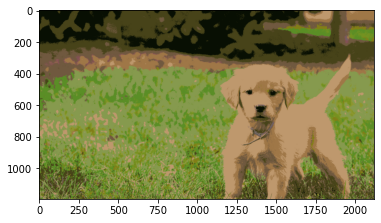

In [32]:
plt.imshow(img_qnt.astype(int))